<a href="https://colab.research.google.com/github/JuliaKovalchook/Ukraine-TopoJSON/blob/main/GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Де існують дані

Перш ніж працювати з географічними даними їх потрібно десь знайти.  

Для адміністративних меж України є сайт [https://decentralization.gov.ua/](https://decentralization.gov.ua/) і хоч зараз, здається, сайт має якісь проблеми, але, якщо постаратися, то він містить безліч корисної інформації особливо в розділі [Атлас](http://web.archive.org/web/20210815051818/https://atu.decentralization.gov.ua/), який зараз, на жаль, [не працює](https://atu.decentralization.gov.ua )

Для більш специфічних запитів інформацію можна отримати з [Openstreetmap](https://github.com/JuliaKovalchook/Ukraine-TopoJSON/blob/6d623b1a1119870fd891a99e6c1e05fc1d523d70/Instructions%20Openstreetmap.md)


##Відкритя існуюч даних

Для роботи з географічними даними існує чудова бібліотека [geopandas](https://geopandas.org/en/stable/) яка дозволяє працювати з даними практично так само, як і зі звичайним DataFrame

In [16]:
import geopandas as gpd

path='https://raw.githubusercontent.com/JuliaKovalchook/Ukraine-TopoJSON/main/Data/Ukraine_oblasts.geojson'
gdf_oblast = gpd.read_file(path, driver='GeoJSON')
gdf_oblast.head()


,область,oblast,geometry
0,Івано-Франківська область,Ivano-Frankivska Oblast,"POLYGON ((24.89187 47.72449, 24.88306 47.72429..."
1,Автономна Республіка Крим,Avtonomna Respublika Krym Oblast,"MULTIPOLYGON (((33.50629 44.61602, 33.50639 44..."
2,Волинська область,Volynska Oblast,"POLYGON ((25.16613 50.33100, 25.15611 50.32718..."
3,Вінницька область,Vinnytska Oblast,"POLYGON ((28.57753 48.18213, 28.57059 48.17784..."
4,Дніпропетровська область,Dnipropetrovska Oblast,"POLYGON ((36.58515 47.84744, 36.52089 47.83650..."


Перевіримо, як вони відображаються

<Axes: >

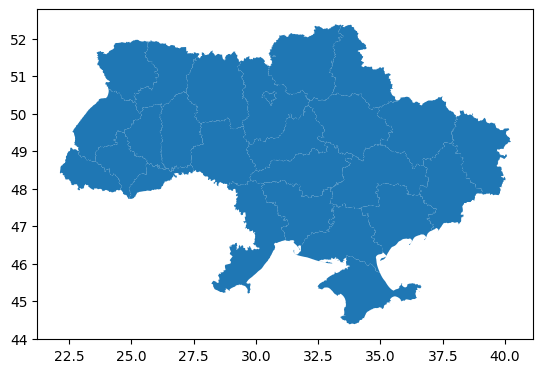

In [17]:
gdf_oblast.plot()


##Openstreetmap

Отримання даних Openstreetmap за допомогою Overpass API

In [6]:
import requests

overpass_url = "https://overpass-api.de/api/interpreter?data="
overpass_query = '''
[out:json];
area['name:uk'='Одеська область'];
(rel['admin_level'='6'](area););
out geom;
'''
response = requests.get(overpass_url,  params={'data': overpass_query})
data = response.json()
#data

Отримані дані є в форматі JSON, переведемо їх в GeoJSON

In [10]:
import osm2geojson
geo_json=osm2geojson.json2geojson(data)

Після цього переведемо дані в GeoPandas

In [11]:
import geopandas as gpd
import pandas as pd
gdf = gpd.GeoDataFrame.from_features(geo_json["features"])
gdf

,geometry,type,id,tags
0,"MULTIPOLYGON (((30.20447 45.25711, 30.20471 45...",relation,11821462,"{'admin_level': '6', 'boundary': 'administrati..."
1,"MULTIPOLYGON (((29.31546 45.73168, 29.32386 45...",relation,11883401,"{'admin_level': '6', 'boundary': 'administrati..."
2,"MULTIPOLYGON (((29.99895 46.38935, 29.99859 46...",relation,11883402,"{'admin_level': '6', 'boundary': 'administrati..."
3,"MULTIPOLYGON (((28.70478 45.46930, 28.70461 45...",relation,11884966,"{'admin_level': '6', 'boundary': 'administrati..."
4,"MULTIPOLYGON (((29.87609 47.41331, 29.87682 47...",relation,11885531,"{'admin_level': '6', 'alt_name:ko': '베레집카 군;베레..."
5,"MULTIPOLYGON (((29.49475 47.13152, 29.49573 47...",relation,11885532,"{'admin_level': '6', 'boundary': 'administrati..."
6,"MULTIPOLYGON (((28.84773 48.07878, 28.83993 48...",relation,11886169,"{'admin_level': '6', 'boundary': 'administrati..."


Тепер з GeoDataFrame можна працювати і виконувати всі функції як з звичайним DataFrame

Видалемо все зайве

In [12]:
gdf['tags'].loc[0]

{'admin_level': '6',
 'boundary': 'administrative',
 'katotth': 'UA51080000000061776',
 'name': 'Ізмаїльський район',
 'name:cs': 'Izmajilský rajón',
 'name:de': 'Rajon Ismajil',
 'name:en': 'Izmail Raion',
 'name:hr': 'Izmajilski rajon',
 'name:ko': '이즈마일 군',
 'name:pl': 'Rejon izmailski',
 'name:ro': 'Raionul Ismail',
 'name:ru': 'Измаильский район',
 'name:uk': 'Ізмаїльський район',
 'place': 'district',
 'type': 'boundary',
 'wikidata': 'Q103842911',
 'wikipedia': 'uk:Ізмаїльський район'}

In [13]:
column_from_teg=['name:uk',  'name:en']
gdf[column_from_teg] = pd.json_normalize(gdf['tags'])[column_from_teg]
gdf=gdf[['name:uk',  'name:en', 'geometry']]
gdf

,name:uk,name:en,geometry
0,Ізмаїльський район,Izmail Raion,"MULTIPOLYGON (((30.20447 45.25711, 30.20471 45..."
1,Білгород-Дністровський район,Bilhorod-Dnistrovskyi Raion,"MULTIPOLYGON (((29.31546 45.73168, 29.32386 45..."
2,Одеський район,Odesa Raion,"MULTIPOLYGON (((29.99895 46.38935, 29.99859 46..."
3,Болградський район,Bolhrad Raion,"MULTIPOLYGON (((28.70478 45.46930, 28.70461 45..."
4,Березівський район,Berezivka Raion,"MULTIPOLYGON (((29.87609 47.41331, 29.87682 47..."
5,Роздільнянський район,Rozdilna Raion,"MULTIPOLYGON (((29.49475 47.13152, 29.49573 47..."
6,Подільський район,Podilsk Raion,"MULTIPOLYGON (((28.84773 48.07878, 28.83993 48..."


## Робота з geopandas



Перевіремо, які дані ми маємо, візуалізувавши їх


Text(0.5, 1.0, 'Before grouping')

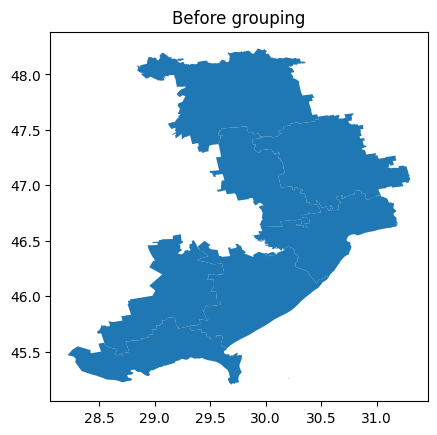

In [14]:
gdf.plot().set_title('Before grouping')


Згрупуємо дані, щоб отримати лише один полігон Одеської області

,index,geometry,name:uk,name:en
0,0,"MULTIPOLYGON (((30.20504 45.25734, 30.20479 45...",Ізмаїльський район,Izmail Raion


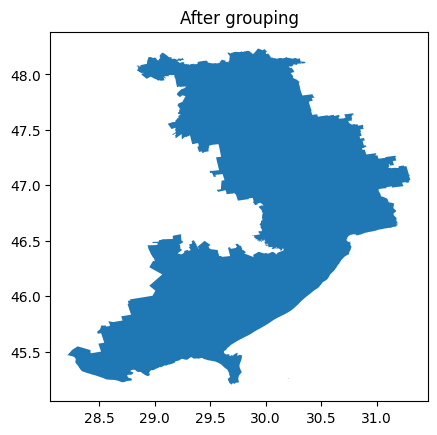

In [ ]:
#https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

gdf_oblast = gdf.dissolve(aggfunc='first').reset_index() # для позначення поля групування by=['region']
gdf_oblast.plot().set_title('After grouping')
gdf_oblast


##Збереження даних

Збережемо файл в форматі GeoJSON

In [ ]:
#save file
path="Data/Ukraine_oblasts.geojson"
gdf_oblast.to_file(path, driver="GeoJSON")


###Перетворення до TopoJson


In [24]:
# https://pypi.org/project/pytopojson/

from pytopojson import topology
import json

geojson_object = json.loads(gdf.to_json())
topology_ = topology.Topology()
topojson = topology_({"object_name": geojson_object})


In [27]:
#save file

file_name='Topo_Ukraine_oblast.json'
with open(file_name, 'w') as f:
    json.dump(topojson, f, ensure_ascii=False)


або через командний рядок терміналу <br>
`geo2topo Ukraine_oblasts.geojson > Topo_Ukraine_oblasts.json`
